In [2]:
# Bandhav Veluri

import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [3]:
# Constants

hbar = 1.0546e-34
m0 = 9.1094e-31
eV = 1.602e-19
meV = 1e-3 * eV
Adot = 1.0e-10
nm = 1.0e-9

<IPython.core.display.Javascript object>


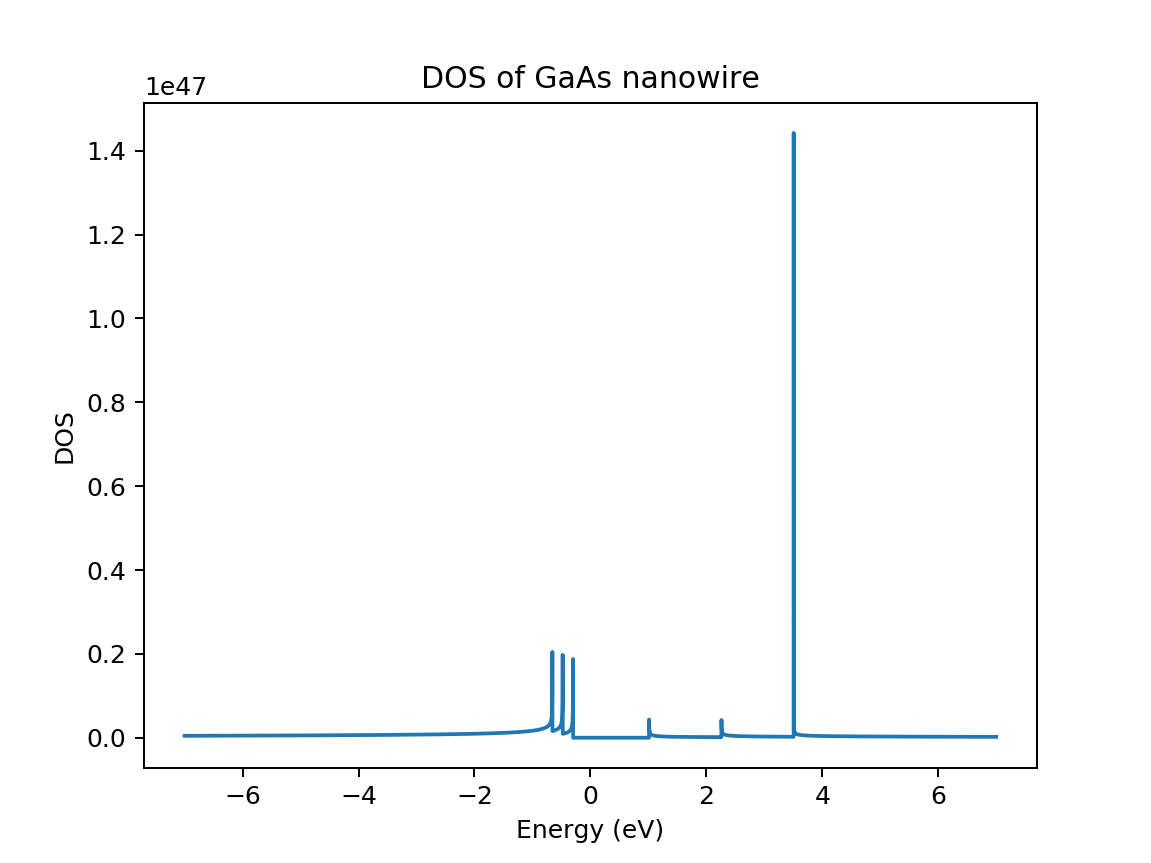

Text(0.5, 1.0, 'DOS of GaAs nanowire')

In [72]:
####################################
# 3

# GaAs nanowire
me = 0.067 * m0
mh = 0.47 * m0
L = 6 * nm

def E_2d(mc, l, m, L1, L2):
    return (((hbar*np.pi)**2) / (2*mc)) * \
            (((l / L1) ** 2) + ((m / L2) **2))

def DOS_nanowire(E, x, y, L1, L2, Ec, Ev):
    subbands = [(1,1), (1,3), (3,3)]
    conduction_bands = 0.0
    valence_bands = 0.0
    
    for (l,m) in subbands:
        delta_Ec = E - Ec - E_2d(me, l, m, L1, L2)
        delta_Ev = Ev + E_2d(mh, l, m, L1, L2) - E
        ec, ev = 0, 0
        
        if delta_Ec > 0:
            ec = ((np.sin(l*np.pi*x / L1) * np.sin(m*np.pi*y / L2)) ** 2) *\
                    (np.sqrt(me / (2 * delta_Ec)))
        
        if delta_Ev > 0:
            ev = ((np.sin(l*np.pi*x / L1) * np.sin(m*np.pi*y / L2)) ** 2) *\
                    (np.sqrt(mh / (2 * delta_Ev)))
        
        conduction_bands += ec
        valence_bands += ev
    
    return (4 / (L1 * L2 * np.pi * hbar)) * \
            (conduction_bands + valence_bands)

E = np.linspace(-7, 7, 10000) * eV
x = 0.5 * L
y = 0.5 * L
L1 = L
L2 = L
Ec = 0.7 * eV
Ev = -0.7 * eV

DOS = [DOS_nanowire(e, x, y, L1, L2, Ec, Ev) for e in E]

plt.figure()
plt.plot(E / eV, DOS)
plt.ylabel('DOS')
plt.xlabel('Energy (eV)')
plt.title("DOS of GaAs nanowire")